# State vector and density matrix in Dirac notation (bra-ket notation)

## How to run this code in my jupyter notebook

The code below allows running the file named `init.ipynb` (as well as other accessory files that start with `init-` and will be properly included in the files where they are needed) which is located in the same folder as this file. To run the code in your own notebook, just save `init-`'s in your directory and include as the line below. After running this code, you will be able to play the examples in this file.

In [141]:
%run init.ipynb

## What can we do with these codes?

The following code presents a comprehensive toolset for converting row matrices, column matrices, and density operators into Dirac notation. This notation is a powerful tool in the realm of quantum mechanics, allowing for efficient manipulation of quantum states and operators.

Not only does this code offer conversion capabilities, but it also provides additional tools for obtaining analytical results in quantum mechanics using Dirac notation. This includes tools for computing inner products, outer products, and tensor products of quantum states and operators.

Moreover, this code is not limited to qubits but can also handle systems beyond qubits. It is formulated to support up to 9-dimensional qudits, enabling researchers to investigate and analyze more complex quantum systems.

To facilitate comprehension and understanding, the code includes a range of examples. These examples illustrate the use of the tools provided in various contexts and showcase how they can be used to analyze and manipulate quantum states and operators.

In summary, this code provides a powerful and versatile set of tools for working with Dirac notation in quantum mechanics. We hope that these tools will be of great assistance to researchers and practitioners in the field, enabling them to explore new and exciting frontiers in quantum physics.

## Generic vector state

### `psi_c(n, word='c', mtype=0)`

The function  `psi_c(n, word='c', mtype=0)` takes the levels of a qudit and the matrix type, whether it is a column (`mtype=0`) or a row (`mtype=1`). You can choose different symbols for the coefficients, just send the desired symbol to `word`. By default `word='c'`

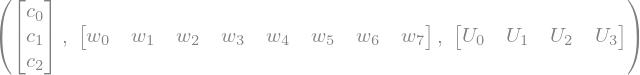

In [84]:
psi_c(3), psi_c(8, word='w', mtype=1), psi_c(4, 'U', 1)

### `pbin(n, mtype=0)`

Same function as `psi_c`, but writes the index of the coefficients in the computational base. It can be useful to retrain the coefficients when we use more qubits among other utilities.

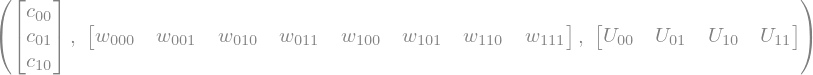

In [85]:
psi_bin(3), psi_bin(8, word='w', mtype=1), psi_bin(4, 'U', 1)

Well, the result of the two previous functions are matrices. It is possible to construct matrices for systems of several dimensions without having to specify the dimension in question, as long as you construct the matrix correctly for the dimension you are studying.

In the next function we can build matrices with something more intuitive than what we see when we work with the bra-ket notation. We will be able to see how many subsystems we are using and the state of each one of them, but we will necessarily need to inform the dimension of one of the subsystems that we are using.

### `mysim(expr)`

A simpler way to put the expression result in a more elegant and eye-pleasing form. Just send the expression.

**Note**: This function does not always return the best situation, which is why it is not, by default, implemented within functions.

### `pbk(seq, dim=2, mtype=0)`

This function lets you convert a string into a row or column matrix. We can construct several state vectors with this function. Each digit of the `seq`, for example, `seq = '010'`, characterizes a subsystem. In this case, if it's qubits, we'll have three qubits, but it could be another system, qutrits, ququads, and so on, as long as we include the correct dimension (`dim`) of the system. By default, the `dim` equals 2 and the array type (`mtype`) is `0` and is associated with a column array. It is worth noting that each number present in the sequence has values that can range from `0` to `dim-1`. That is, for qubits, each digit of `seq` can assume `0` or `1`. For qutrits, each digit on `seq` can assume values between `0` and `2`, and so on.

You can also include other bases, such as the base of $x$ or the Bell's basis, but the resulting matrix will always be written in computational base terms. The computational basis is given by $\{0,1\}$ the basis of $x$ is given by $\{+,-\}$, the basis of $y$ is given by $\{r,l\} = \{\oplus,\ominus\}$ and the Bell base can be added via $\{P,Q,R,S\} = \{\Phi_{+}, \Phi_{-}, \Psi_{+}, \Psi_{-}\}$. Just be aware that when inserting with any Bell base, automatically, it is already considering two qubits. Below we will present some examples to make its use clearer.

This way of building the matrix has a more visual appeal. We were able to know more objectively how many systems are involved as well as the status of the system. Then we'll update with other function (called `mbk`) to convert to bra-ket notation and everything will make more sense.

**Note:** By default `dim=2`, `mtype=0`, that is, you do not need to enter these values if your choice is exactly that. On the other hand, if you want something different, just include the values in the sequence they appear in the function. If you don't want to include any of them, and this works for other functions of this material, just specify explicitly the parameter that will receive what you want. Example: I want `seq='101`, with `dim=2` and `mtype=1`, you can send the function like this:
`pbk('101', mtype=1)`
i.e. you need to identify `mtype` since you are ignoring `dim=2`.


Below are some usage examples:

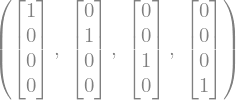

In [86]:
pbk('00'), pbk('01'), pbk('10'), pbk('11')

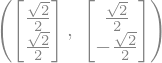

In [87]:
pbk('+'), pbk('-')

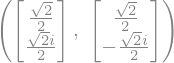

In [88]:
mysim(pbk('r')), mysim(pbk('l'))

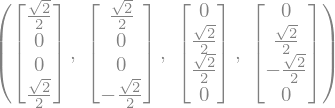

In [89]:
pbk('P'), pbk('Q'), pbk('R'), pbk('S')

In [90]:
pbk('00', mtype=1), pbk('01',2,1), pbk('10',mtype=1, dim=2), pbk('11',2,1)

Each bit constructed in the `seq` characterizes a qudit. For example, for `dim = 2, '00'` represents two qubits in state $\vert0\rangle$ each, that is, $\vert0\rangle \otimes \vert0\rangle = \vert00\rangle$. Another example, with `dim = 3`, `'120'` represents three qutrits i.e $\vert1\rangle \otimes \vert2\rangle \otimes \vert0\rangle = \vert120\rangle$

#### Qudits

In [91]:
pbk('120', 3, 1) # dim=3 --> three qutrits three qutrits have 3^3 = 27 levels

In [92]:
pbk('43', 5) # two qudits with dim = 5 have 5^2=25 levels

#### More specific way to construct Bell's basis or othres states

If we were to build Bell's base $\vert\Phi_+\rangle$ from scratch, we could build it like this

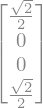

In [93]:
Φ_plus = (1/sqrt(2))*(pbk('00') + pbk('11'))
Φ_plus

We can also build a matrix manually to later convert it into bra-ket notation using our codes. $\vert\Phi_+\rangle$  examples can be written in sympy as follows:

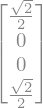

In [94]:
Matrix([1/sqrt(2),0,0,1/sqrt(2)])

## Generic density matrix ($\rho$)

###  `rho_g(n, word='0')`

Same idea as the state vector. By default `word='0'` give us the greek letter $\rho$:

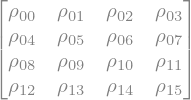

In [95]:
rho_g(4)

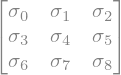

In [96]:
rho_g(3, 'sigma')

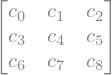

In [97]:
rho_g(3, 'c')

### `rho_bin(n, word='0')`

Same idea as the previous case, but the indices are written in binary form.

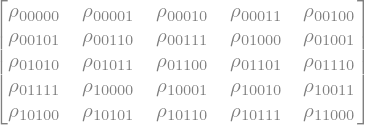

In [98]:
rho_bin(5)

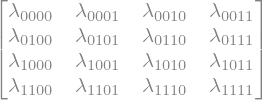

In [99]:
rho_bin(4, 'lambda')

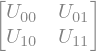

In [100]:
rho_bin(2, 'U')

## Dirac notation

### `mbk(matrix, dim=2)`

This is the function that lets you write matrices in Dirac notation. If you send a state vector from sympy, the function will return you the state vector in this notation. If you send a density matrix, the function returns you the density operator in that notation. You can choose the size of the subsystem. By default, `2` is sent to represent qubits. If you have, for example four qutrits, you should send just `dim=3`.

#### Some examples of the application of the function above:

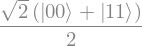

In [102]:
mysim(mbk(Matrix([1/sqrt(2),0,0,1/sqrt(2)])))

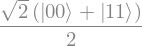

In [103]:
mysim(mbk(Φ_plus))

#### Other cases

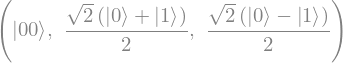

In [104]:
mbk(pbk('00')), mysim(mbk(pbk('+'))), mysim(mbk(pbk('-')))

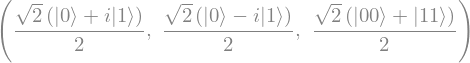

In [105]:
mysim(mbk(pbk('r'))), mysim(mbk(pbk('l'))), mysim(mbk(pbk('P')))

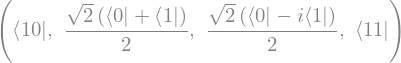

In [106]:
mbk(pbk('10', mtype=1)), mbk(pbk('+',2,1)), mysim(mbk(pbk('l',mtype=1, dim=2))), mbk(pbk('11',2,1))

#### Qudits

Be careful to always include the correct dimension. Each bit goes from 0,1,2,...,dim-1. For example

In [107]:
mbk(pbk('10', 2)), mbk(pbk('10', 3), 3)

The example above gives us the same ket, but fundamentally, in the construction of the matrix, we have something totally different.

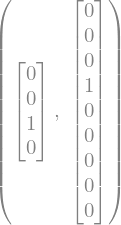

In [108]:
pbk('10', 2), pbk('10', 3)

as we can see in the matrix representation above. Another examples:

In [109]:
mbk(psi_c(3), 3) # one qutrit

In [110]:
mbk(psi_c(9, 'h', 1), 3) # two qutrits

In [111]:
mbk(psi_c(4, 'o'), 4) # one ququad

In [112]:
mbk(psi_c(4, 'k'), 2) # two qubits

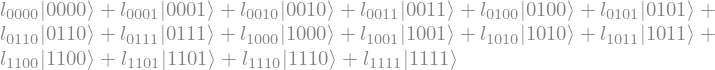

In [113]:
mbk(pbin(16, 'l')) # four qubits

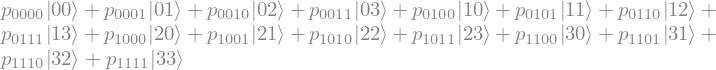

In [114]:
mbk(pbin(16, 'p'), 4) # two ququads

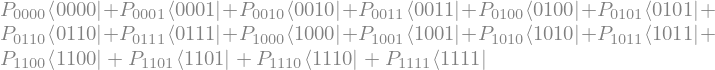

In [115]:
mbk(pbin(16,'P',1)) # four qubits

In [116]:
mbk(pbk('120', 3), 3) # dim=3 --> three qutrits

In [117]:
mbk(pbk('43', 5, 1), 5) # qudits=5 --> two qudits with dim=5

In the last two cases, if it is in another dimension besides the binary one, we must pass the dimension to both functions, both `pbk` and `mbk`.

#### Density matrix

Considering `rho_g(4)` to be two qubits.

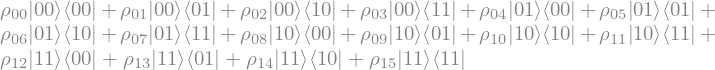

In [118]:
mbk(rho_g(4))

Considering `rho_g(4)` to be a ququad.

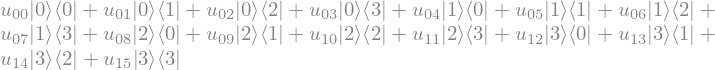

In [119]:
mbk(rho_g(4, 'u'), 4)

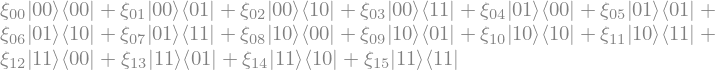

In [120]:
mbk(rho_g(4, 'xi'),2)

But this can also be thought of as two qubits. For this reason, the question of the dimension used must be taken into account with great care.

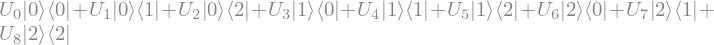

In [121]:
mbk(rho_g(3, 'U'),3)

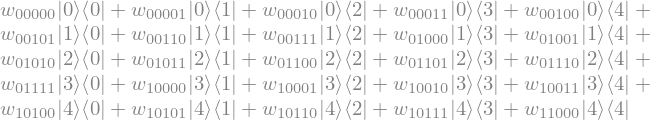

In [122]:
mbk(rho_bin(5, 'w'),5)

#### Bell Base

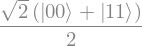

In [123]:
Φ_plus = pbk('P')
mysim(mbk(Φ_plus))

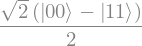

In [124]:
Φ_minus = pbk('Q')
mysim(mbk(Φ_minus))

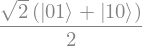

In [125]:
Ψ_plus = pbk('R')
mysim(mbk(Ψ_plus))

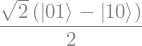

In [126]:
Ψ_minus = pbk('S')
mysim(mbk(Ψ_minus))

#### Complex numbers

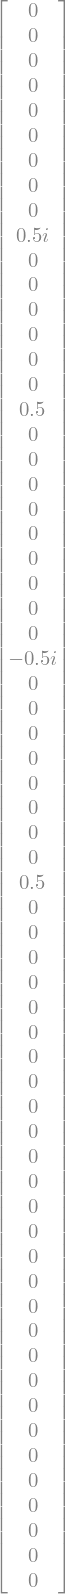

In [127]:
ψ = pbk('010000') + 1j*pbk('001001') - 1j*pbk('011010') + pbk('100011')
ψ = ψ/norm(ψ)
ψ

In [128]:
mbk(ψ)

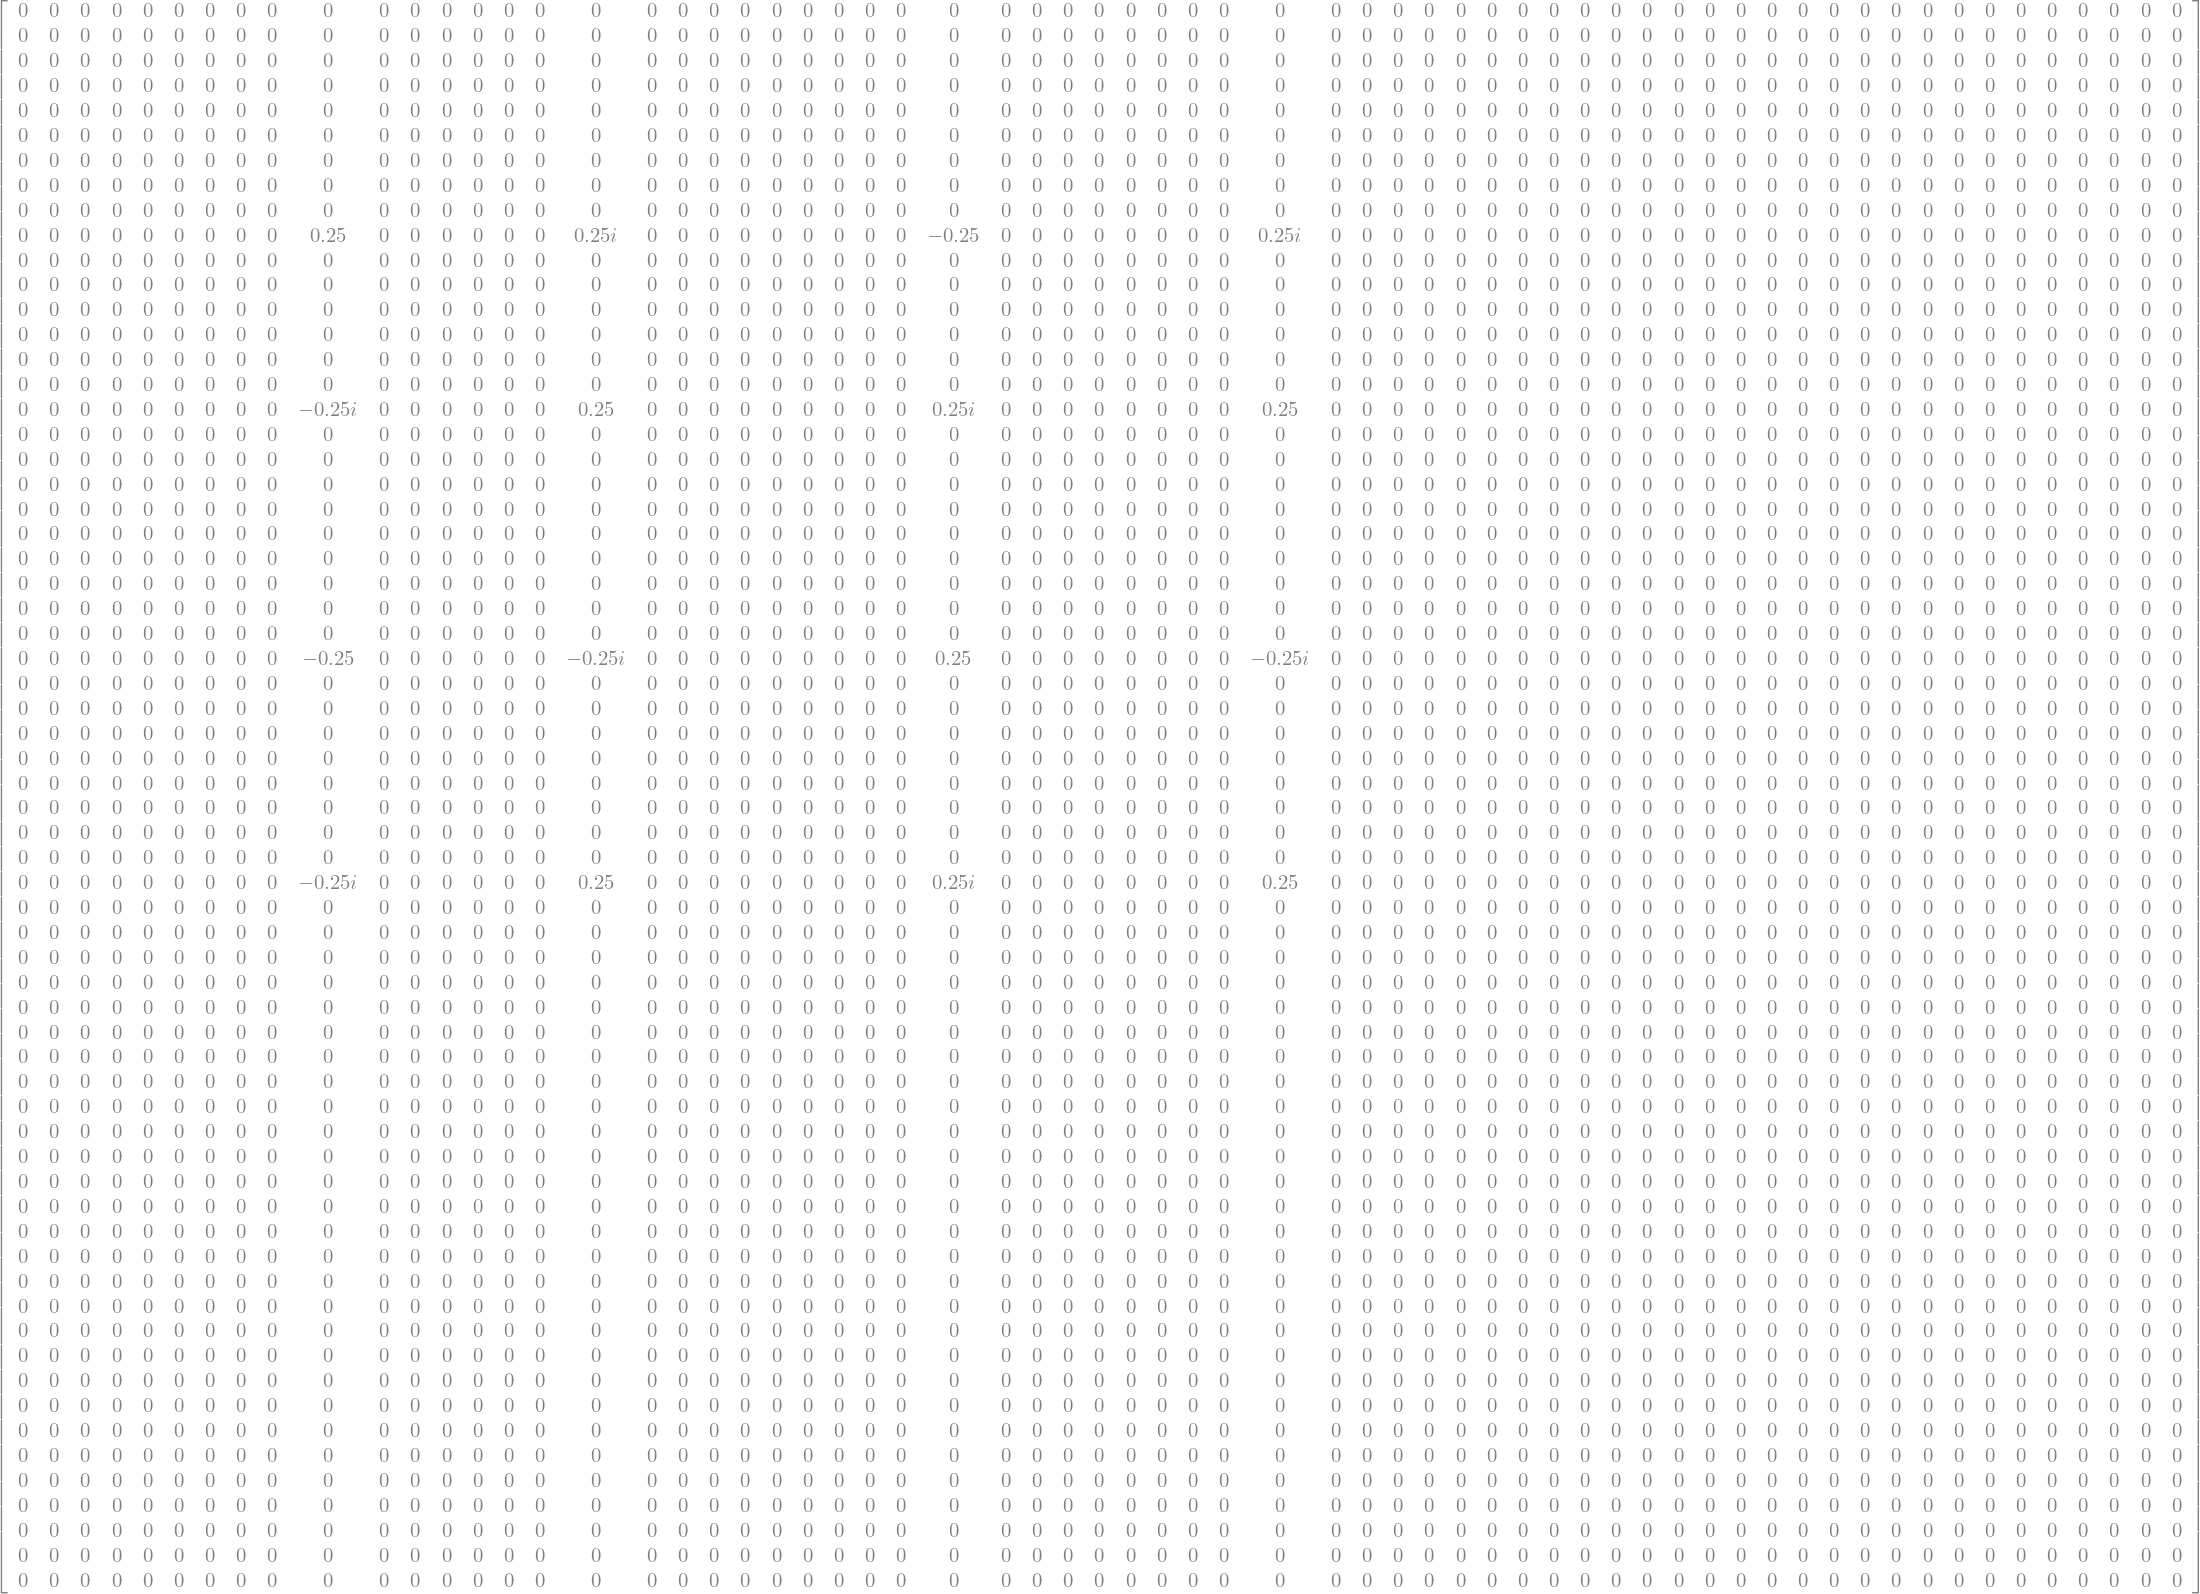

In [129]:
ρ = proj(ψ)
ρ

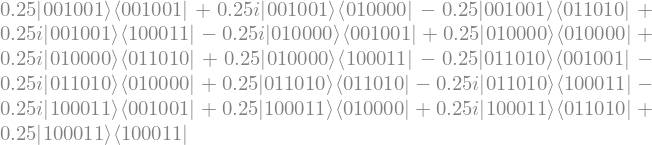

In [130]:
mbk(ρ)

#### Practical example of qiskit

We will demonstrate the use of the provided codes in a practical application using qiskit. In this example we use 6 qubits and perform state tomography on 4 of them. At this point we obtained the density matrix below through state tomography, but we could not identify whether the tomography was being done correctly.

In [131]:
ρ = array([[ 2.03189087e-04+0.00000000e+00j,  1.61529535e-04-2.13001736e-04j,
        -1.71422399e-06-7.80990062e-05j, -1.38591265e-04+8.90317754e-05j,
        -8.13170299e-05-1.73810581e-04j,  5.44919778e-06-1.46784949e-04j,
        -1.14408775e-04+5.90830656e-05j,  1.56217199e-04-4.89681826e-04j,
        -1.27063502e-04+1.19452720e-04j, -3.10702338e-05-8.20597956e-05j,
         2.85227684e-05+2.76278563e-05j, -2.85912488e-04-4.43330332e-04j,
         4.83550768e-06-1.29777293e-04j,  1.41160025e-04-4.98955271e-05j,
        -2.29509331e-05+9.42283561e-05j,  5.76741734e-04+3.92657296e-04j],
       [ 1.61529535e-04+2.13001736e-04j,  8.20550606e-04+0.00000000e+00j,
         3.34418335e-04-1.51615072e-04j,  5.23079986e-04+7.00583221e-04j,
         9.63199438e-05-2.32053242e-04j,  5.54686558e-04-3.49469172e-05j,
        -4.82684177e-04-3.47110237e-04j,  1.47951572e-03-8.59652515e-04j,
        -2.36456669e-04-5.66425067e-05j, -4.85986283e-05+1.94357883e-04j,
        -2.65907898e-04-5.90144346e-05j,  7.48746845e-04-9.60557250e-05j,
         1.29557474e-04-1.19436012e-04j,  1.62881538e-04-7.87653416e-05j,
         1.52310069e-04+2.70957303e-04j, -6.88933812e-04+1.60888245e-03j],
       [-1.71422399e-06+7.80990062e-05j,  3.34418335e-04+1.51615072e-04j,
         5.49719599e-04+0.00000000e+00j,  9.42132860e-04-1.82061913e-04j,
         6.46848578e-05-3.89709545e-05j,  2.06586699e-04+1.94712984e-04j,
        -6.55679287e-05+5.86418573e-05j,  8.11618842e-05-8.52605454e-04j,
        -5.72785230e-05-5.87954344e-05j,  2.58209667e-04-5.85941433e-06j,
        -1.57183534e-04-2.10625808e-04j, -3.06601168e-04-4.85121748e-04j,
         4.02607102e-05-6.01073047e-06j,  1.47536663e-04-3.52924566e-04j,
         3.26410081e-05+7.97638292e-05j,  9.90246352e-05-1.88717247e-04j],
       [-1.38591265e-04-8.90317754e-05j,  5.23079986e-04-7.00583221e-04j,
         9.42132860e-04+1.82061913e-04j,  2.50573662e-01+0.00000000e+00j,
         6.11457085e-04+5.29293851e-04j,  7.74060143e-04-6.16192958e-04j,
        -3.03989389e-04+2.69798376e-04j, -2.90781739e-04-2.48030889e-01j,
        -2.09344276e-03+1.03230254e-03j, -3.08996822e-04+1.36640538e-03j,
         4.67737106e-04+3.68000353e-04j,  4.12378830e-04-2.16733637e-05j,
        -5.64199486e-04-1.31218592e-03j, -1.62044546e-03+6.69180811e-04j,
        -9.31003637e-04+1.73276012e-03j, -2.11016202e-04-5.97885082e-04j],
       [-8.13170299e-05+1.73810581e-04j,  9.63199438e-05+2.32053242e-04j,
         6.46848578e-05+3.89709545e-05j,  6.11457085e-04-5.29293851e-04j,
         1.90113507e-04+0.00000000e+00j,  1.08206066e-04+6.91777122e-05j,
         2.27332155e-05-1.14423871e-04j, -2.05704453e-05-2.98429159e-04j,
        -5.86189989e-05-1.58151262e-04j,  7.72919562e-05-2.73211453e-06j,
        -2.42017150e-05+1.81788989e-05j, -6.06804988e-05-1.11630415e-03j,
         1.03553306e-04+6.08277458e-05j, -1.17655616e-05+1.60747623e-04j,
        -8.53765007e-05-5.35601102e-05j,  4.65945483e-04-2.41298479e-04j],
       [ 5.44919778e-06+1.46784949e-04j,  5.54686558e-04+3.49469172e-05j,
         2.06586699e-04-1.94712984e-04j,  7.74060143e-04+6.16192958e-04j,
         1.08206066e-04-6.91777122e-05j,  4.81761618e-04+0.00000000e+00j,
        -3.10211588e-04-3.23236144e-04j,  1.14056936e-03-6.71644820e-04j,
        -1.08957391e-04-1.07411936e-04j, -6.91531109e-05+1.93727277e-04j,
        -2.78430321e-04-1.23128767e-07j,  5.14853645e-06-3.25240107e-04j,
         8.38253861e-05-1.05776992e-05j, -6.97869253e-05-2.53895724e-05j,
         1.83372111e-04+1.48449678e-04j, -3.02070033e-04+2.94655780e-04j],
       [-1.14408775e-04-5.90830656e-05j, -4.82684177e-04+3.47110237e-04j,
        -6.55679287e-05-5.86418573e-05j, -3.03989389e-04-2.69798376e-04j,
         2.27332155e-05+1.14423871e-04j, -3.10211588e-04+3.23236144e-04j,
         7.71786421e-04+0.00000000e+00j, -6.00728064e-04+6.17418242e-04j,
         1.13570989e-04-2.37680682e-05j, -1.51476286e-04-5.38186639e-04j,
         1.31470187e-04-9.32465696e-05j, -1.46230813e-03-4.73129935e-04j,
        -2.25660773e-05+8.65373514e-05j, -2.40342047e-04-2.42969206e-05j,
        -3.64329231e-04-2.36171395e-05j,  6.13696756e-04-2.14152610e-03j],
       [ 1.56217199e-04+4.89681826e-04j,  1.47951572e-03+8.59652515e-04j,
         8.11618842e-05+8.52605454e-04j, -2.90781739e-04+2.48030889e-01j,
        -2.05704453e-05+2.98429159e-04j,  1.14056936e-03+6.71644820e-04j,
        -6.00728064e-04-6.17418242e-04j,  2.47499568e-01+0.00000000e+00j,
        -1.43949672e-03-2.43012246e-03j, -1.07209495e-03-3.51057118e-04j,
        -4.98333196e-04+5.92784953e-04j,  1.24244616e-03-6.46097484e-04j,
         1.69893143e-03-5.86804364e-04j, -4.84709468e-04-1.21193085e-03j,
        -1.92828847e-03-9.80620955e-04j, -4.00575150e-04+1.71590238e-03j],
       [-1.27063502e-04-1.19452720e-04j, -2.36456669e-04+5.66425067e-05j,
        -5.72785230e-05+5.87954344e-05j, -2.09344276e-03-1.03230254e-03j,
        -5.86189989e-05+1.58151262e-04j, -1.08957391e-04+1.07411936e-04j,
         1.13570989e-04+2.37680682e-05j, -1.43949672e-03+2.43012246e-03j,
         1.89886898e-04+0.00000000e+00j, -3.69224239e-05+4.82183000e-05j,
        -4.85837226e-06-5.93560938e-05j,  1.84164964e-03+3.58968452e-04j,
        -8.90857833e-05+8.28043135e-05j, -1.08377189e-04-5.15572714e-05j,
         7.47323461e-05-4.13513346e-05j, -2.05396178e-05+1.31669201e-03j],
       [-3.10702338e-05+8.20597956e-05j, -4.85986283e-05-1.94357883e-04j,
         2.58209667e-04+5.85941433e-06j, -3.08996822e-04-1.36640538e-03j,
         7.72919562e-05+2.73211453e-06j, -6.91531109e-05-1.93727277e-04j,
        -1.51476286e-04+5.38186639e-04j, -1.07209495e-03+3.51057118e-04j,
        -3.69224239e-05-4.82183000e-05j,  6.37979691e-04+0.00000000e+00j,
         2.63189698e-06+7.22261917e-05j, -1.45924603e-04+5.73821805e-04j,
         4.45934438e-05+3.63752965e-05j,  1.07346617e-04-1.63095898e-04j,
         4.37370473e-05-3.49993621e-04j, -6.90061423e-04-7.57894998e-05j],
       [ 2.85227684e-05-2.76278563e-05j, -2.65907898e-04+5.90144346e-05j,
        -1.57183534e-04+2.10625808e-04j,  4.67737106e-04-3.68000353e-04j,
        -2.42017150e-05-1.81788989e-05j, -2.78430321e-04+1.23128767e-07j,
         1.31470187e-04+9.32465696e-05j, -4.98333196e-04-5.92784953e-04j,
        -4.85837226e-06+5.93560938e-05j,  2.63189698e-06-7.22261917e-05j,
         2.33348014e-04+0.00000000e+00j, -1.02529941e-03+1.39288970e-03j,
         1.50290078e-06-1.99378668e-05j,  1.55291173e-04+1.26273570e-04j,
        -1.69956784e-04-4.48090746e-05j, -1.22437076e-03-1.05828750e-03j],
       [-2.85912488e-04+4.43330332e-04j,  7.48746845e-04+9.60557250e-05j,
        -3.06601168e-04+4.85121748e-04j,  4.12378830e-04+2.16733637e-05j,
        -6.06804988e-05+1.11630415e-03j,  5.14853645e-06+3.25240107e-04j,
        -1.46230813e-03+4.73129935e-04j,  1.24244616e-03+6.46097484e-04j,
         1.84164964e-03-3.58968452e-04j, -1.45924603e-04-5.73821805e-04j,
        -1.02529941e-03-1.39288970e-03j,  2.50059791e-01+0.00000000e+00j,
        -8.13362047e-04-1.10140199e-03j, -1.83958836e-03-1.78834239e-04j,
        -2.22825014e-04+5.55315785e-04j,  1.90687050e-03+2.47144768e-01j],
       [ 4.83550768e-06+1.29777293e-04j,  1.29557474e-04+1.19436012e-04j,
         4.02607102e-05+6.01073047e-06j, -5.64199486e-04+1.31218592e-03j,
         1.03553306e-04-6.08277458e-05j,  8.38253861e-05+1.05776992e-05j,
        -2.25660773e-05-8.65373514e-05j,  1.69893143e-03+5.86804364e-04j,
        -8.90857833e-05-8.28043135e-05j,  4.45934438e-05-3.63752965e-05j,
         1.50290078e-06+1.99378668e-05j, -8.13362047e-04+1.10140199e-03j,
         1.03992238e-04+0.00000000e+00j,  4.78585212e-05+7.93103843e-05j,
        -8.56985249e-05-2.45930338e-05j, -1.53050858e-03-6.94975346e-04j],
       [ 1.41160025e-04+4.98955271e-05j,  1.62881538e-04+7.87653416e-05j,
         1.47536663e-04+3.52924566e-04j, -1.62044546e-03-6.69180811e-04j,
        -1.17655616e-05-1.60747623e-04j, -6.97869253e-05+2.53895724e-05j,
        -2.40342047e-04+2.42969206e-05j, -4.84709468e-04+1.21193085e-03j,
        -1.08377189e-04+5.15572714e-05j,  1.07346617e-04+1.63095898e-04j,
         1.55291173e-04-1.26273570e-04j, -1.83958836e-03+1.78834239e-04j,
         4.78585212e-05-7.93103843e-05j,  5.11429251e-04+0.00000000e+00j,
        -3.94110124e-05+9.91203028e-05j, -3.49512884e-04-1.34990737e-03j],
       [-2.29509331e-05-9.42283561e-05j,  1.52310069e-04-2.70957303e-04j,
         3.26410081e-05-7.97638292e-05j, -9.31003637e-04-1.73276012e-03j,
        -8.53765007e-05+5.35601102e-05j,  1.83372111e-04-1.48449678e-04j,
        -3.64329231e-04+2.36171395e-05j, -1.92828847e-03+9.80620955e-04j,
         7.47323461e-05+4.13513346e-05j,  4.37370473e-05+3.49993621e-04j,
        -1.69956784e-04+4.48090746e-05j, -2.22825014e-04-5.55315785e-04j,
        -8.56985249e-05+2.45930338e-05j, -3.94110124e-05-9.91203028e-05j,
         3.63046612e-04+0.00000000e+00j,  8.07217164e-04-1.61595800e-04j],
       [ 5.76741734e-04-3.92657296e-04j, -6.88933812e-04-1.60888245e-03j,
         9.90246352e-05+1.88717247e-04j, -2.11016202e-04+5.97885082e-04j,
         4.65945483e-04+2.41298479e-04j, -3.02070033e-04-2.94655780e-04j,
         6.13696756e-04+2.14152610e-03j, -4.00575150e-04-1.71590238e-03j,
        -2.05396178e-05-1.31669201e-03j, -6.90061423e-04+7.57894998e-05j,
        -1.22437076e-03+1.05828750e-03j,  1.90687050e-03-2.47144768e-01j,
        -1.53050858e-03+6.94975346e-04j, -3.49512884e-04+1.34990737e-03j,
         8.07217164e-04+1.61595800e-04j,  2.46810176e-01+0.00000000e+00j]])

This density matrix is a case obtained in one of our works. Note that it is difficult to identify significant values, in addition to being a very large matrix. In addition, we were unable to identify the corresponding bar-ket of the most significant elements beforehand.

First of all let's convert to a sympy matrix for better visualization:

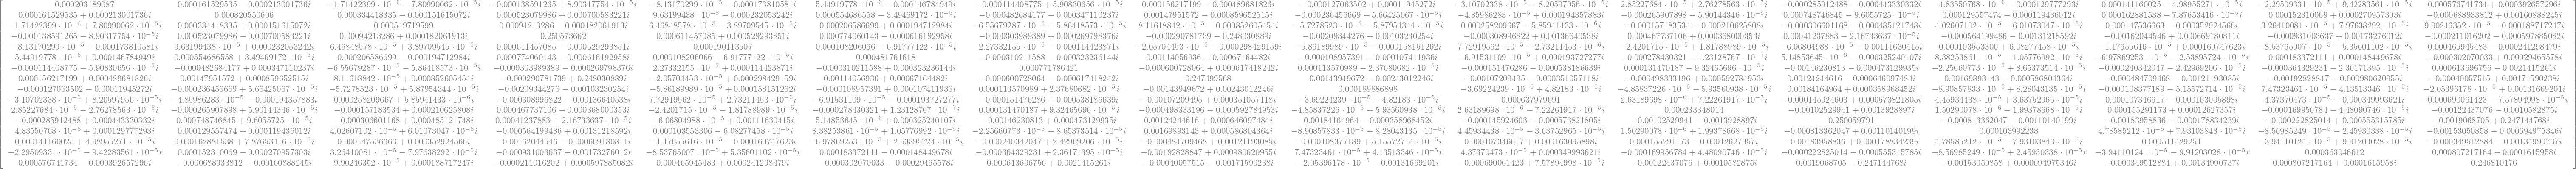

In [132]:
sympy.Matrix(ρ)

Now let's use another code that allows us to simplify sympy array elements individually, we do this through:

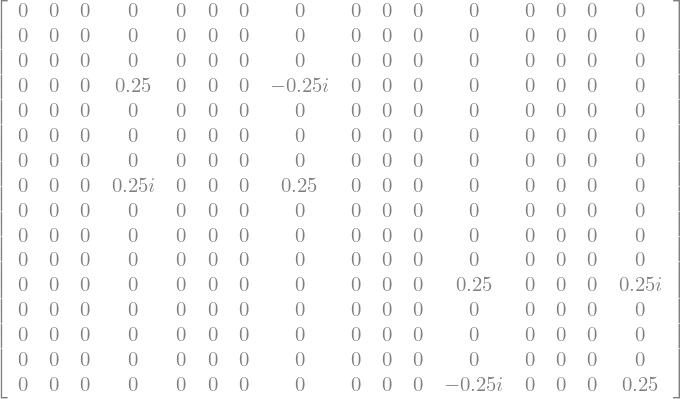

In [133]:
sympy.Matrix(ρ).applyfunc(lambda x: round(x, 2))

Here we could already convert our analytical results obtained in bra-ket notation into a matrix, or, using the code presented here, convert the matrix with the most significant digits into bra-ket notation. So, sending the simplified matrix to the `mbk` function we get the state of the system in Dirac notation:

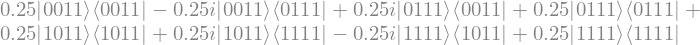

In [134]:
mbk(sympy.Matrix(ρ).applyfunc(lambda x: round(x, 2)))

With this, we were able to verify much more easily that the analytical results were in accordance with what we were getting from the simulation.

## Alternative way to construct states

As we saw before, we can construct state vectors as in the examples below:

In [135]:
ψ1 = psi_c(2)
mbk(ψ1)

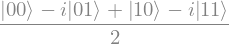

In [136]:
ψ2 = pbk('+l')
ψ2 = ψ2/norm(ψ2)
mysim(mbk(ψ2))

In [137]:
ψ3 = pbk('1')
mbk(ψ3)

### Global system by composition of subsystems

#### `comp_sys(*psi)`

Let's assume that our global system is a system composed of `ψ1`, `ψ2` and `ψ3`. To build this composite state, we can use the `comp_sys(*psi)` function. `*psi` means we can send multiple states separated by commas. The order in which you send the states is the order in which the tensor product will be executed. So `ψ1` $\otimes$ `ψ2` $\otimes$ `ψ3` can be constructed using

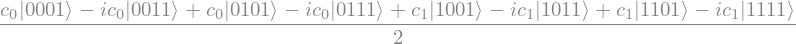

In [142]:
Ψ1 = comp_sys(ψ1, ψ2, ψ3)
mysim(mbk(Ψ1))

That it is different if we send in the reversed order for example. With `ψ3` $\otimes$ `ψ2` $\otimes$ `ψ1`, we will get

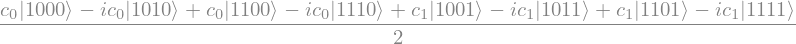

In [143]:
Ψ2 = comp_sys(ψ3, ψ2, ψ1)
mysim(mbk(Ψ2))

## Additional notes

You cannot set the result of `mbk` as a state if you want to continue performing operations with the state, because `mbk` is a kind of `print`, it just prints the state in that format. For this reason, you should always use the matrix to follow up with the accounts and changes you want to make with the states.

In the [01-quantum_logic_gates_action-evolved_states.ipynb](01-quantum_logic_gates_action-evolved_states.ipynb) file we will present functions that allow changing the position of the subsystems and actuating quantum logic gates (QLG) and controlled quantum logic gates (CQLG).